In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
classifier.add(Flatten())

In [7]:
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/Data/train',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('/Data/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 600 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [11]:
classifier.fit_generator(training_set,
        steps_per_epoch=562,
        epochs=25,
        validation_data=test_set,
        validation_steps=101)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
562/562 [==============================] - 229s 408ms/step - loss: 0.1937 - accuracy: 0.9185 - val_loss: 0.6585 - val_accuracy: 0.7906
Epoch 2/25
562/562 [==============================] - 239s 425ms/step - loss: 0.0648 - accuracy: 0.9753 - val_loss: 0.7288 - val_accuracy: 0.8027
Epoch 3/25
562/562 [==============================] - 237s 421ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.9629 - val_accuracy: 0.8392
Epoch 4/25
562/562 [==============================] - 218s 389ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 1.1256 - val_accuracy: 0.8148
Epoch 5/25
562/562 [==============================] - 218s 388ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 1.0647 - val_accuracy: 0.8389
Epoch 6/25
562/562 [==============================] - 233s 415ms/step - loss: 0.0160 - accuracy: 0.9943 - val_loss: 1.4040 - val_accuracy: 0.8268
Epoch 7/25
562/562 [============================

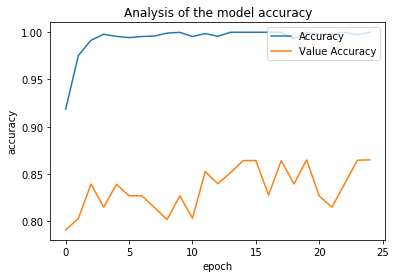

In [12]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

In [13]:
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = classifier.predict(predict_image)
    return result.max()

In [14]:
predictImg('Image/you/want/to/predict')


1.0

In [15]:
predictImg('Image/you/want/to/predict')


0.0

In [16]:
classifier.save("PotHoleDetectionModel.h5")